<a href="https://colab.research.google.com/github/ParthSharma1197/Capstone-Project-Cardiovascular-Risk-Prediction/blob/main/PARTH_SHARMA_Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Project Title` : **`CardioVascular Risk Prediction`**
Cardiovascular Risk Prediction
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

**Problem Statement(Objective):**

The goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

**General Description:**

Predicting and diagnosing heart disease is the biggest challenge in the medical industry.Factors which influence heart diseases are cholesterol level of the body, smoking habit, and obesity, family history of diseases, blood pressure.Machine learning algorithms can play a vital and accurate role in predicting heart disease in coming potential years based opent the current way of living and this can potentially help the paitent to be attentive towards the declining health and necessar measures can be taken to lower down the risk. In this project we will be looking for various Machine Learning Algorithms being applied on the data set and finally choose one which gives us the best possible results and help in making more accurate predictions.

**Data Set Description**:

The dataset contains the following attributes: 
id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD

## **Loading Dataset and Importing Libraries**

In this initial section we will be looking for some initial overview of the data so that what we get to know our data.

First, we will mount the drive and  import all the python libraries that are required throughout the course of our analysis, which include NumPy for numerical calculations and scientific computing, Pandas for cleaning,performing required actions on the dataset, and Matplotlib and Seaborn that will be used for visualization.

In [89]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
#importing the libraries required for the analysis
# Importing the modules that will be required over the course of flow throughout this project
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import KNNImputer

from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report,f1_score,precision_score,recall_score,roc_auc_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


We will now load the data into the colab envirnoment and perform some actions to study and clean our data.

In [126]:
#importing the dataset in our colab envirnoment
working_dir_path ="/content/drive/MyDrive/Colab Notebooks/CAPSTONE EDA-Cardiovascular Risk Prediction/data_cardiovascular_risk.csv"
df=pd.read_csv(working_dir_path)

In [127]:
## Let's have a look first five rows of our dataset to have a lookover
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [128]:
## Let's have a look at last five rows of our dataset to have a lookover
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [129]:
## Let's have a look over the number of rows and columns in our dataset
shape=df.shape
print("The data set contains record for {} paitients.\nNumber of metrics for evaluation are: {}\nThere is 1 target variable. ".format(shape[0],(shape[1]-1)))

The data set contains record for 3390 paitients.
Number of metrics for evaluation are: 16
There is 1 target variable. 


In [130]:
## Learning the details of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [131]:
# Getting the list of all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Getting the statistical summary of our data set. Describe method,very informatively summarizes the numerical features of the data set.We can draw various conclusions. 

In [132]:
#Getting the statistical Summary of our dataset
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


###  **Observations that  enlightens some keypoints :**
1. For Age,we can observ that our data set contains the data of the people whose age ranges between 32-70 years.
2. Cigrattes Per Day: We can say that the average number of cigrattes that people consume is 9 but max number being 70 that is 
   very hard to digest and can be assumed to be an outlier but we will see that in the further course of analysis.
3. Heart rate ranges from 45-143 beats per minutes with the mean value of almost 76 bpm that is nominal rate as per medical      experts. 
4. According to the medical experts the nominal range of BMI is 18.5—24.9 and here in our dataset  mean value of BMI is 25 that is average population comes under the Healthy category but the max value goes to 56 that obese category.

In [133]:
# Above observations made me curious to look at how many paitents come under the category of obese:
count=0
for bmi in df.BMI:
    if bmi >=30:
        count=count+1
print('Number of patient that comes under the category of obese are : {} '.format(count))

Number of patient that comes under the category of obese are : 439 


## **Feature Description**
### Demographic:
    • Sex: Male or Female("M" or "F").
    • Age: Age of the patient;(Continuous-Although the recorded ages have been truncated to whole numbers,the concept of 
      age is continuous).
    
### Behavioral
    • is_smoking: Whether or not the patient is a current smoker ("YES" or "NO")
    • Cigs Per Day: The number of cigarettes that the person smoked on average in one day.(can be
      considered continuous as one can have any number of cigarettes, even half a cigarette).
    
### Medical( history)
    • BP Meds: Whether or not the patient was on blood pressure medication (Nominal).
    • Prevalent Stroke: Whether or not the patient had previously had a stroke (Nominal).
    • Prevalent Hyp: Whether or not the patient was hypertensive (Nominal).
    • Diabetes: Whether or not the patient had diabetes (Nominal).
    
### Medical(current)
    • Tot Chol: Total cholesterol level (Continuous).
    • Sys BP: Systolic blood pressure (Continuous).
    • Dia BP: Diastolic blood pressure (Continuous).
    • BMI: Body Mass Index (Continuous).
    • Heart Rate: Heart rate (Continuous-In medical research, variables such as heart rate though in fact discrete,yet 
      are considered continuous because of large number of possible values).
    • Glucose: Glucose level (Continuous).
    • Target Variable: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# **Data Cleaning**
Till now we only had a look over on our data,so that we can understand a little bit about our data set and we have drawn certain observations that are stated above and will be helpful in the further course of our analysis.Now, we will just process our data in order to make it sufficiently good so that it can be passed into our predictive algorithms.There are certain steps that are involved that are as follows:


### **1. Working on the columns and datatypes of the column.**
Since we can clearly see that the BP Meds,Prevalent Stroke,Prevalent Hyp,Diabetes are categorical in nature and since they are  numeric datatype we need to convert them so that appropiate operations could be applied.

##### I have created a function for changing the a particular datatype into the required one.

In [135]:
# Function for changing the data type
def convert_dtype(dataframe,col_list,target_dtype):
    dataframe[col_list]=dataframe[col_list].astype(str(target_dtype))

In [136]:
## For Changing the datatype of the above stated features:
cols =['sex','education','BPMeds', 'prevalentStroke', 'prevalentHyp','diabetes','TenYearCHD']
convert_dtype(df,cols,'object')

In [137]:
# Checking for the applied changes
df.info()
print()
print('Hence the changes applied has been sucessfully executed')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   object 
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   object 
 7   prevalentStroke  3390 non-null   object 
 8   prevalentHyp     3390 non-null   object 
 9   diabetes         3390 non-null   object 
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   object 
dtypes: float64(7),

Generic check over the id column

In [138]:
#Let's have a look over the number of unique values this feature contains
df['id'].value_counts().sum()

3390

Therefore, from the above output we can say that number of unique values that id contains are 3390 and as we now that our predictive models leans through the pattern in our data and since there is can no pattern that a model could asses therefore in the next step we will drop the id column.

In [139]:
#dropping the id column
df.drop(['id'], axis = 1,inplace=True)

In [140]:
#Checking for the applied changes
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **2. Checking for the Duplicate values:**

Why do we actually need to check for duplicate values and treat them?

Data collection happens through multiple channels including online, face to face or in call centres.Holding more than one record of someone possibly with conflicting information. Identifying and removing these duplicate records from your dataset sometimes becomes an importatnt.You will develop one, complete version of the truth of a dataset so that we can make an accurate data.Time and money are saved by not sending identical communications multiple times.Thus by removing the duplicate values we can maintain the integrity of our data set which in turn helps us to supply as good data to our predictive models.

In [141]:
## Checking for duplicates in our dataset
duplicate=df.duplicated().any()
if duplicate:
    print("Duplicate Rows in our dataset are:{}".format(df.duplicated().sum()))
else:
    print("There are no duplicate records present in our dataset")

There are no duplicate records present in our dataset


### **3. Checking and treating the Missing Values**
Now as we have started the stage of data cleaning, we have seen that there are no duplicate values in our data set and now we will moving forward to check our dataset for the missing values.

There are Numerous techniques by which we can treat out missing values.Some of which are listed below:

#### 1. Complete Case Analysis:
Here what we do is we directly drop the rows that posses any null value in order to make our dataset clean.We will be using this technique for only those columns where our missing values counts lesser than 5% of the total number of rows in the data set.

#### 2. Imputation:

Univariate: Here we use the single column for the course of treating the missing values and we simply impute some statistical value in replacement of the missing values.
Multivariate: Here we take into account all the features to understand the pattern and then fill the missing values using the case of similarity.In this category we prominently have 2 types of imputers that are KNN and Interative imputer.

In [142]:
## Checking for missing values
null_val=df.isna().sum()
print('Missing Data Count :')
print(null_val,'\n')
print('The percentage of missing values are:\n{} '.format(round((df.isna().sum())/len(df)*100),5))

Missing Data Count :
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64 

The percentage of missing values are:
age                0.0
education          3.0
sex                0.0
is_smoking         0.0
cigsPerDay         1.0
BPMeds             1.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            1.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            9.0
TenYearCHD         0.0
dtype: float64 


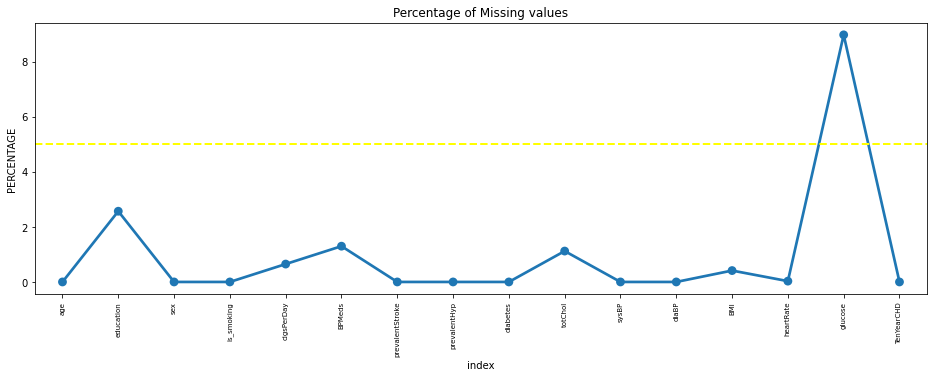

In [143]:
#Visualising the missing values through pointplot
missing = pd.DataFrame((null_val)*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
ax.axhline(5, color='yellow', linestyle='dashed', linewidth=2)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Dashed yellow line represent that we will be dropping all missing values in a column whose percantage of missing values lies below this basline. 

In [144]:
#Defining a function to drop all the missing values that lies below the threshold of 5%
def drop_null_less_5(d_frame):
    
    '''Creats a list of all those columns where null values ranges between 0 and 5 %
       and dropping all those rows that satisfies the condition'''
    
    null_features=[col for col in d_frame.columns if d_frame[col].isna().sum()/len(df)<0.05 and df[col].isna().sum()/len(df)>0]
    
    print('List of all the features that has percetage of missing values lesser than 5%:\n\n{}'.format(null_features))
    
    for col in d_frame.columns:
        if d_frame[col].isna().sum() >0:
       
            if col in null_features:
                d_frame.dropna(subset=[col],inplace=True)
                
            #else:
                #d_frame[col].fillna(d_frame[col].median(), inplace=True)

#executing the function        
drop_null_less_5(df) 

List of all the features that has percetage of missing values lesser than 5%:

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']


In [145]:
# Function for checking for the presence of null values
def check_null(data):
    
    '''Print the total count of null values present
       in each data column and final shape of the dataset'''
    
    print(data.isna().sum())
    
    print('The shape of our dataset is: {}'.format(data.shape))

In [146]:
# Checking for the null values after dropping the null values
check_null(df)

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            262
TenYearCHD           0
dtype: int64
The shape of our dataset is: (3189, 16)


### **Treating the missing values in Glucose**: 
For glucose column that represent the glucose level in the body there are almost 304 nan-values and after dropping the other nan values comes down to 262 and it will not be advisable to drop that much rows from our dataset.We can impute any statistical value of random value to the replace the nan-values,though it will solve our purpose but at the cost of predictions made by our model by harming the accuracy.Therefore, we will be using the KNN imputer here to fill the missing values and filling the nan-values by the vote of similarity with nearest neighbour.KNN imputer here also works as an algorithm therefore we need to encode the cateorical variables.

Encoding our categorical features to make the dataset suitable for imputation

In [147]:
#Encoding our features 
df['sex'] = df['sex'].map({'M':0,'F':1})
#df['is_smoking']=df['is_smoking'].replace(('yes', 'no'), (1, 0), inplace=True)
df['is_smoking'] = df['is_smoking'].map({'NO':0,'YES':1})

It is an assumption that any imputation done should not affect the distribution of our feature.Therefore, we must have a look on the distribution of the feature to be imputed before and after the imputation

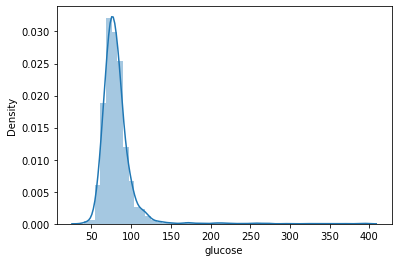

In [148]:
# Checking the distribution of the glucose
sns.distplot(df.glucose)

In [149]:
#Instantiating the object/instance of the class KNN imputor with k=3:

knn = KNNImputer(n_neighbors=3,weights='distance',metric='nan_euclidean')

#fit and transform the imputer on the dataframe

df_new= knn.fit_transform(df)

We get an array after the imputation thus we need to convert the array to dataframe.Also the data type of our categorical dataset would have changed to integer or float thus we need to change it to object as the earlier and we will be doing by passing the dataframe to the function created earlier to change the datatype.

In [150]:
#New dataframe after all the cleaning so far
df_transformed =pd.DataFrame(data=df_new,columns=df.columns) 
df_transformed.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
1,46.0,1.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
2,50.0,1.0,0.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
3,64.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
4,61.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,272.0,182.0,121.0,32.80,85.0,65.0,1.0


#### Here we have an observation the distribution before and after there the imputation is almost same

In [151]:
#Checking for null values through the function defined
check_null(df_transformed)

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
The shape of our dataset is: (3189, 16)


In [152]:
#Getting back all the columns to their appropiate datatype
col_list=['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# passing the list to the function convert_dtype 

convert_dtype(df_transformed,col_list,'object')

In [153]:
# Checking for the nan values and the datatype for each colums simultaneously
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3189 non-null   float64
 1   education        3189 non-null   object 
 2   sex              3189 non-null   object 
 3   is_smoking       3189 non-null   object 
 4   cigsPerDay       3189 non-null   float64
 5   BPMeds           3189 non-null   object 
 6   prevalentStroke  3189 non-null   object 
 7   prevalentHyp     3189 non-null   object 
 8   diabetes         3189 non-null   object 
 9   totChol          3189 non-null   float64
 10  sysBP            3189 non-null   float64
 11  diaBP            3189 non-null   float64
 12  BMI              3189 non-null   float64
 13  heartRate        3189 non-null   float64
 14  glucose          3189 non-null   float64
 15  TenYearCHD       3189 non-null   object 
dtypes: float64(8), object(8)
memory usage: 398.8+ KB


In [154]:
#Let's have a look over the first few records of our transformed dataset
df_transformed.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
1,46.0,1.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
2,50.0,1.0,0.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
3,64.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
4,61.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,272.0,182.0,121.0,32.80,85.0,65.0,1.0


In [155]:
#List of all the numeric variables
num_features=df_transformed.select_dtypes(include=['int64','float64']).columns.values
num_features

array(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'], dtype=object)

In [156]:
#List of all the categoricla variables
cat_features=df_transformed.select_dtypes(include=['object']).columns.values
cat_features

array(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'], dtype=object)

### 4. Checking for Outliers and their treatement
An Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.It can also be regarded as the odd one out which means something unusual in comparison to the others in a group.
An outlier may occur due to the variability in the data, or due to experimental error/human error.They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

If we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers


1. Boxplots
2. Z-score
3. Inter Quantile Range(IQR)  

We will be using the Box Plot technique for visualising the outliers present in our dataset.we will be plotting the same after the outliers treatment to conform the complete treatement of the ouliers.

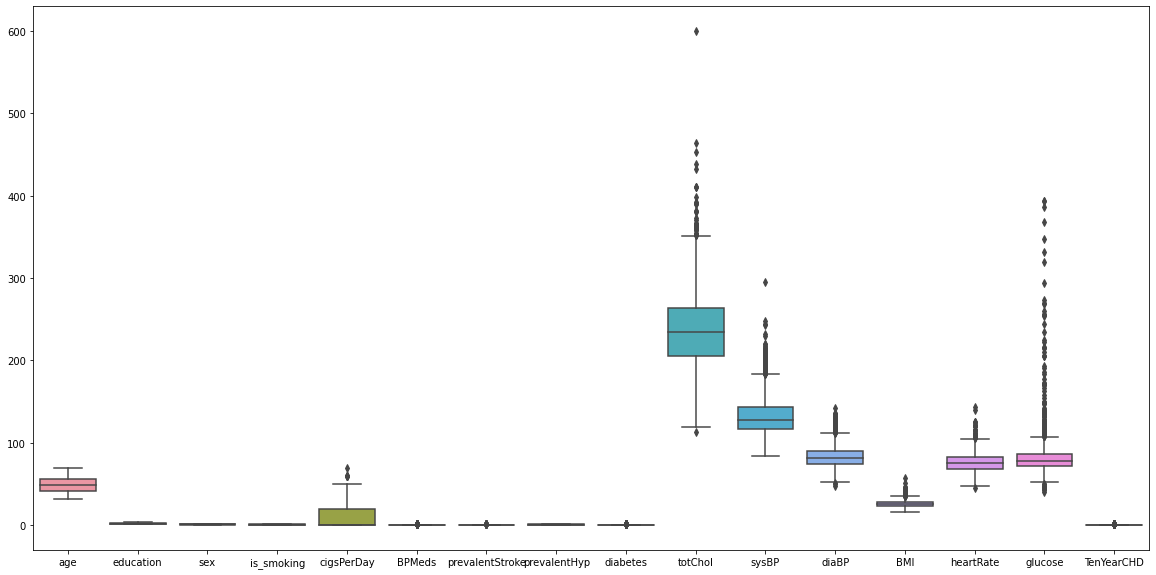

In [157]:
#Plotting the box plot for checking the outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df_transformed)
plt.show()

From the the above plot we can see that,outliers are observed in:

1. cigsperday:
2. totchol
3. diaBp
4. sysBP
5. BMI
6. heartRate
7. glucose

In [158]:
# treating the outliers using the IQR Method

def outliers(data,cols):
    
    '''Takes dataframe and columns list as the input and treats the outliers using the 
       IQR method and finally capping the outliers within the range.'''
    
    
    for each_feature in cols:
        
        Q1 = np.percentile(data[each_feature], 25) # 25th percentile of the data of the given feature
        Q3 = np.percentile(data[each_feature], 75) # 75th percentile of the data of the given feature
        
        IQR = Q3-Q1 #Interquartile Range
        
        outlier_step = IQR * 1.5 
        
        l_whisker= Q1 - (outlier_step)
        u_whisker= Q3 + (outlier_step)
        
               
        data[each_feature]=np.where(data[each_feature] > u_whisker,u_whisker,
                       np.where(data[each_feature] < l_whisker,l_whisker,data[each_feature]))
        
        
# Applying the above fuction to treat for the outliers in our dataset       
feature=['age', 'cigsPerDay','sysBP','diaBP','totChol', 'BMI', 'heartRate', 'glucose']
            
outliers(df_transformed,feature)

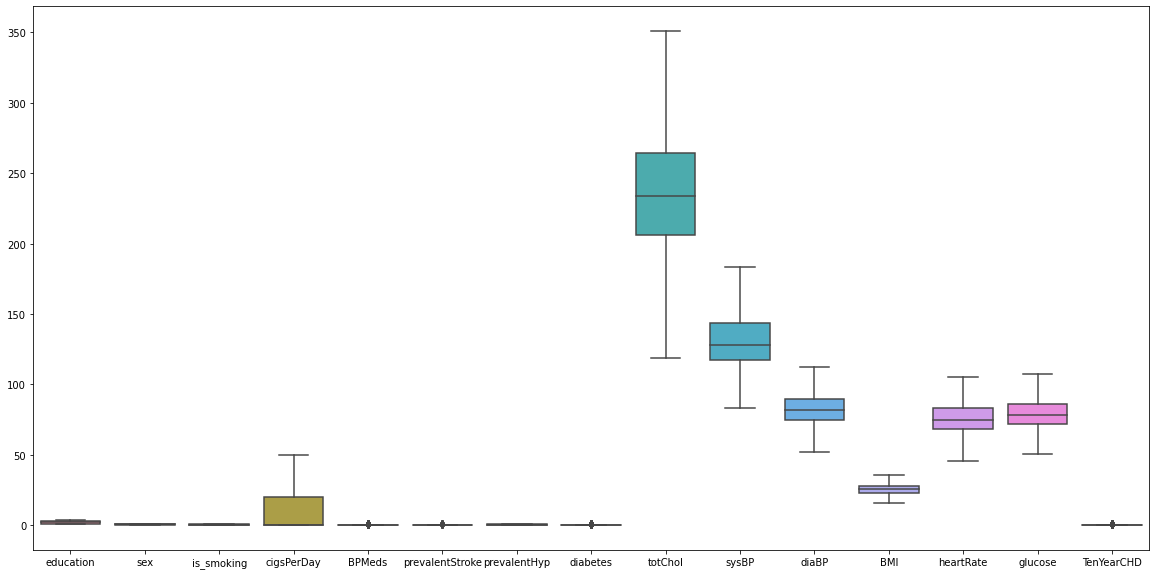

In [159]:
#Having a look at the box plot in order to look for the outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df_transformed.iloc[:,1:])
plt.show()

We have sucessfully removed the outliers present,as in the above plot we can see that there are no datapoints above and below the whiskers.

Now since our dataset is clean from duplicate values,missing values and outliers therefore now we can proceed towards the EDA